In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy.stats as stats, pandas as pd, os, glob
import ast
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [48]:
subj = 'renee'
df = pd.read_csv(glob.glob(f'../results/formatted/*{subj}*csv')[0])[:-1]

# 1.
for col in ['positions']:
    if type(df[col][0]) == str:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x)) # convert str to list

# 3. # get dist between targer & last position
df['MAE_unnormed'] = abs(df['target_pos'] - df['positions'].apply(lambda x: x[-1]))
df['MAE_normed'] = np.where(
    ((df['div'] == -0.2) & (df['valence'] == 'pen')) | ((df['div'] == 0.2) & (df['valence'] == 'rew')),
    df['MAE_unnormed']*2, 
    df['MAE_unnormed']
)

# 4.
df['dist'] = df['positions'].apply(lambda x: abs(x[-1] - x[0]))
df['avg_speed'] = df['dist'] / df['trials.submit_resp.rt']

# 5.
df['choice'] = df['outcome'].apply(lambda x: 1 if abs(x) == 2 else 0 if abs(x) == 1 else 0)
# df = df[df['choice'] != 0]

# 6.
# filtering out easy trials
df_hard = df[df['target_pos'] - df['disp_div'] <= .05].copy()
print(f'% trials with |target-divider| <= .1: {len(df_hard)/len(df): .02f}')

% trials with |target-divider| <= .1:  0.63


compression
reward compressed     52
penalty compressed    51
baseline              48
Name: count, dtype: int64
correct
1.0    113
0.0     38
Name: count, dtype: int64


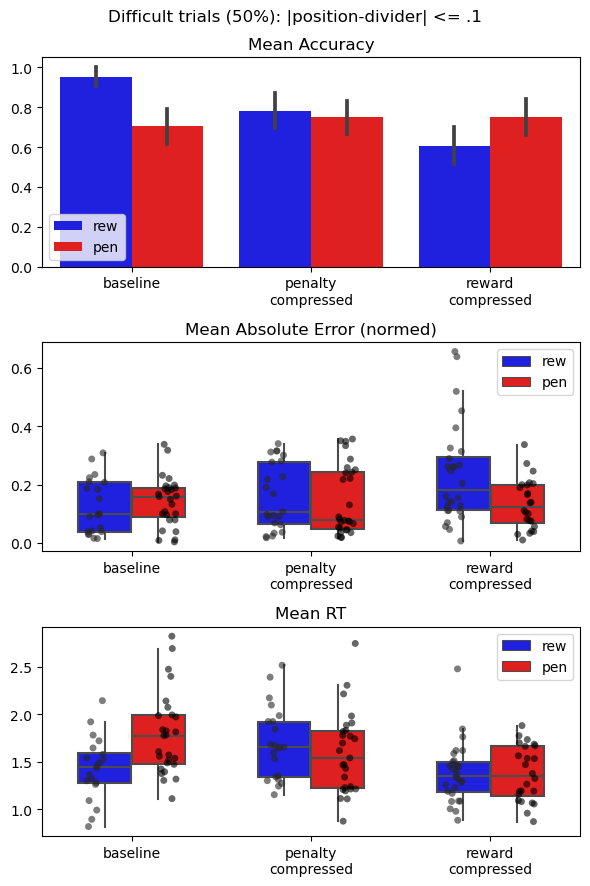

In [50]:
df_plot = df_hard.copy()
# df_plot = df.copy()

df_plot['compression'] = df_plot['div'].apply(lambda x: 'baseline' if x == 0 else 'penalty compressed' if x == -.2 else 'reward compressed')
df_plot['correct'] = df_plot['correct'].apply(lambda x: 0 if x == -1 else x)
print(df_plot['compression'].value_counts())
print(df_plot['correct'].value_counts())

fig, axes = plt.subplots(3, 1, figsize=(6, 9))
fig.suptitle('Difficult trials (50%): |position-divider| <= .1')

# 1.
ax = axes[0]
# group_df = df_plot.groupby(['compression', 'valence'])['correct'].mean().reset_index()
sns.barplot(data=df_plot, x='compression', y='correct', hue='valence', 
            palette = {'rew': 'blue', 'pen': 'red'}, ax=ax, errorbar='se')
# sns.stripplot(data=df_plot, x='compression', y='correct', hue='valence', 
#               dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
# ax.set_ylim(.5, 1)
ax.set_title('Mean Accuracy')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

# 2.
ax = axes[1]
sns.boxplot(data=df_plot, x='compression', y='MAE_normed', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette = {'rew': 'blue', 'pen': 'red'}, ax=ax)
sns.stripplot(data=df_plot, x='compression', y='MAE_normed', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mean Absolute Error (normed)')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

# 3.
ax = axes[2]
sns.boxplot(data=df_plot, x='compression', y='trials.submit_resp.rt', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette = {'rew': 'blue', 'pen': 'red'}, ax=ax)
sns.stripplot(data=df_plot, x='compression', y='trials.submit_resp.rt', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mean RT')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])


plt.tight_layout()
plt.show()